# Question 4:

### Importing of Libraries & Loading of the data set into a dataframe

In [49]:
import math
import pandas as pd
import numpy as np

from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

raw_df = pd.read_csv('Z74.SI.csv')

### Performing exploratory data analysis 

#### Step 1: Shape Analysis

In [50]:
raw_df.shape

(505, 7)

raw_df.head()

#### Step 2: Missing Value Analysis

In [51]:
raw_df.isnull().any().sum()

0

NO NULL values found in test or training dataset.

#### Step 3: Statistical Analysis

In [52]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,505.0,2.491842e+00,2.815405e-01,2.01000,2.330000e+00,2.420000e+00,2.540000e+00,3.410000e+00
High,505.0,2.513703e+00,2.831308e-01,2.04000,2.350000e+00,2.450000e+00,2.560000e+00,3.420000e+00
Low,505.0,2.468653e+00,2.775305e-01,2.00000,2.320000e+00,2.400000e+00,2.510000e+00,3.360000e+00
Close,505.0,2.489069e+00,2.802453e-01,2.00000,2.330000e+00,2.420000e+00,2.540000e+00,3.400000e+00
Adj Close,505.0,2.339425e+00,2.350548e-01,1.86755,2.221378e+00,2.297648e+00,2.399286e+00,3.104212e+00
Volume,505.0,3.047288e+07,1.567877e+07,0.00000,1.980220e+07,2.701720e+07,3.696110e+07,1.194014e+08


#### Step 4: Data Visualization

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

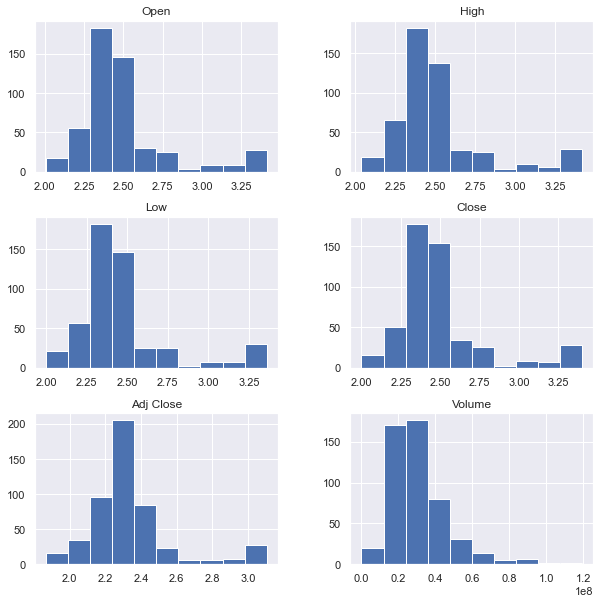

In [53]:
import seaborn as sns
sns.set()
raw_df.hist(figsize=(10,10))

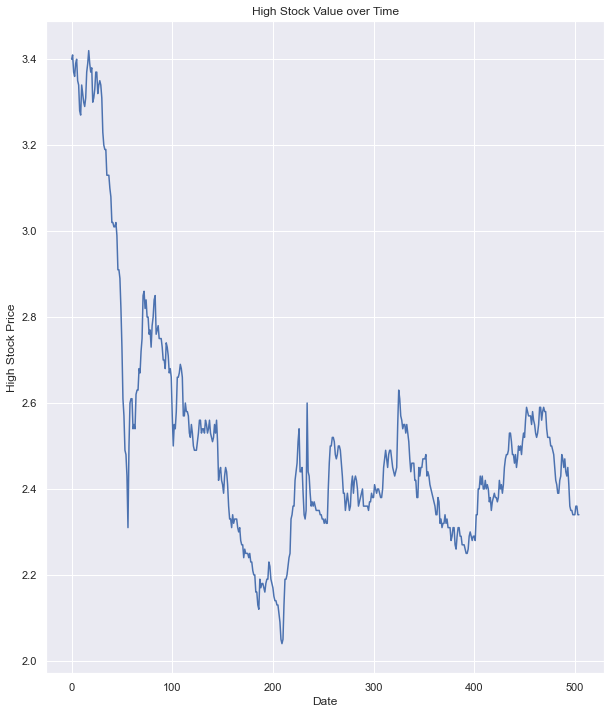

In [54]:
plt.figure(figsize=(10,12))
plt.plot(raw_df['High'])
plt.title('High Stock Value over Time')
plt.xlabel('Date')
plt.ylabel('High Stock Price')
plt.show()

### Data Preprocessing:

In [55]:
splitdf = raw_df.iloc[:252]
splitdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,3.39,3.40,3.36,3.40,3.104212,10742600
1,2020-01-03,3.41,3.41,3.34,3.37,3.076822,15917300
2,2020-01-06,3.36,3.37,3.34,3.35,3.058562,13793100
3,2020-01-07,3.35,3.36,3.30,3.36,3.067692,25232800
4,2020-01-08,3.30,3.39,3.30,3.39,3.095082,28451400


Data must be used for testing and training through December 31, 2020, respectively. As a result, we can deduce that the cutoff value corresponds to the 252nd index. In order to divide our data into a training set and a testing set, we can use it.

In [56]:
splitter = 252
prev_info = 30 #(days)

#### Train-Test Split

In addition, all we need to know to predict the future "High" variable are the last Highs, So we only keep this variable.

In [57]:
high_df = raw_df.filter(['High'])
train_set = high_df.iloc[:splitter].values
#Add the last 30 values of training set to test set, for comparison of predictions and true value.
test_set = high_df.iloc[splitter-prev_info:].values

To get ready for the model, we will first preprocess the data.

We start with normalisation of Data that will help reduce any biases or preference to a particualar variable. Essentially, Without distorting or losing information, we adjust the values of the dataset's numeric columns to conform to a standard scale.

In [58]:
scaler = MinMaxScaler(feature_range=(0,1))
train_set = scaler.fit_transform(train_set)
test_set = scaler.fit_transform(test_set)
train_set

array([[0.98550725],
       [0.99275362],
       [0.96376812],
       [0.95652174],
       [0.97826087],
       [0.98550725],
       [0.94927536],
       [0.94202899],
       [0.89855072],
       [0.89130435],
       [0.94202899],
       [0.92753623],
       [0.91304348],
       [0.9057971 ],
       [0.92028986],
       [0.96376812],
       [0.97826087],
       [1.        ],
       [0.97826087],
       [0.96376812],
       [0.97101449],
       [0.91304348],
       [0.92028986],
       [0.93478261],
       [0.96376812],
       [0.96376812],
       [0.92753623],
       [0.94202899],
       [0.94927536],
       [0.94202899],
       [0.92028986],
       [0.86231884],
       [0.84057971],
       [0.83333333],
       [0.83333333],
       [0.78985507],
       [0.78985507],
       [0.78985507],
       [0.76811594],
       [0.75362319],
       [0.71014493],
       [0.71014493],
       [0.70289855],
       [0.70289855],
       [0.71014493],
       [0.6884058 ],
       [0.63043478],
       [0.630

Hence, We now have normalised values of "High" for the training set as a numpy array.

We first create a training data set that contains the stock's 30-day "high" price and predicts its 31-day "high" price before moving on. Separate the Xtrain and Ytrain segments from the training data set. The Xtrain dataset is independent, while the Ytrain data set is dependent.

In [59]:
## Splitting the dataset into Xtrain and Ytrain datasets.
Xtrain = []
Ytrain = []
for i in range(prev_info, len(train_set)):
  Xtrain.append(train_set[i-prev_info:i, 0])
  Ytrain.append(train_set[i, 0])

#Convert these data to np.array and Reshape
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain.shape

(222, 30, 1)

### Training of the LSTM MODEL

In [60]:
dim = 60
lstm_model = Sequential()

lstm_model.add(LSTM(dim, return_sequences=True, input_shape= (Xtrain.shape[1], 1))) 
lstm_model.add(LSTM(dim, return_sequences= False)) 

lstm_model.add(Dense(25)) 
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mse')
history_data = lstm_model.fit(Xtrain, Ytrain, batch_size=50, epochs=80, verbose=2, validation_split=0.25)

Epoch 1/80
4/4 - 5s - loss: 0.0981 - val_loss: 0.0063 - 5s/epoch - 1s/step
Epoch 2/80
4/4 - 0s - loss: 0.0217 - val_loss: 0.0110 - 223ms/epoch - 56ms/step
Epoch 3/80
4/4 - 0s - loss: 0.0113 - val_loss: 0.0050 - 191ms/epoch - 48ms/step
Epoch 4/80
4/4 - 0s - loss: 0.0118 - val_loss: 0.0050 - 165ms/epoch - 41ms/step
Epoch 5/80
4/4 - 0s - loss: 0.0098 - val_loss: 0.0053 - 201ms/epoch - 50ms/step
Epoch 6/80
4/4 - 0s - loss: 0.0064 - val_loss: 0.0067 - 177ms/epoch - 44ms/step
Epoch 7/80
4/4 - 0s - loss: 0.0075 - val_loss: 0.0052 - 169ms/epoch - 42ms/step
Epoch 8/80
4/4 - 0s - loss: 0.0057 - val_loss: 0.0045 - 168ms/epoch - 42ms/step
Epoch 9/80
4/4 - 0s - loss: 0.0058 - val_loss: 0.0044 - 192ms/epoch - 48ms/step
Epoch 10/80
4/4 - 0s - loss: 0.0054 - val_loss: 0.0044 - 183ms/epoch - 46ms/step
Epoch 11/80
4/4 - 0s - loss: 0.0050 - val_loss: 0.0044 - 214ms/epoch - 53ms/step
Epoch 12/80
4/4 - 0s - loss: 0.0048 - val_loss: 0.0044 - 169ms/epoch - 42ms/step
Epoch 13/80
4/4 - 0s - loss: 0.0047 - val_

### Evaluation of the LSTM Model

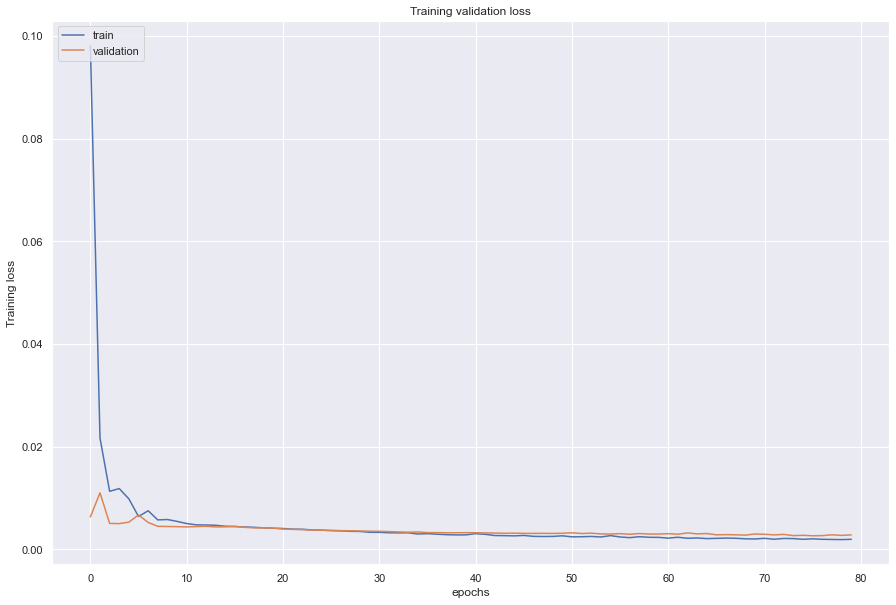

In [61]:
#We can see clearly the training and validation loss suffered by the model
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.title('Training validation loss')
plt.plot(history_data.history['loss'])
plt.plot(history_data.history['val_loss'])
plt.ylabel('Training loss')
plt.xlabel('epochs')
plt.legend(['train' , 'validation'], loc = 'upper left')
plt.show()

In [62]:
Xtest = []
Ytest = high_df.iloc[splitter:].values

for i in range(prev_info, len(test_set)):
  Xtest.append(test_set[i-prev_info:i, 0])

#Convert to an numpy array and then from 2D to 3D
Xtest = np.array(Xtest)
print(Xtest.shape)
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1 ))
print(Xtest.shape)


(253, 30)
(253, 30, 1)


In [63]:
pred = lstm_model.predict(Xtest)
pred = scaler.inverse_transform(pred)
pred.shape

8/8 [==============================] - 3s 13ms/step


(253, 1)

In [64]:
rmse=np.sqrt(np.mean(((pred- Ytest)**2)))
rmse

0.038846820369849766

We use rmse to evaluate our lstm_model because it gives us an idea of the average distance between the observed data values and the predicted data values. Meaning that if we get a very low as we got, The error is very small and the model is working quite accurately.

### Final Prediction Graph Visualisation

C:\Users\Hp\AppData\Local\Temp\ipykernel_23172\851002583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_value['Future Predictions'] = pred


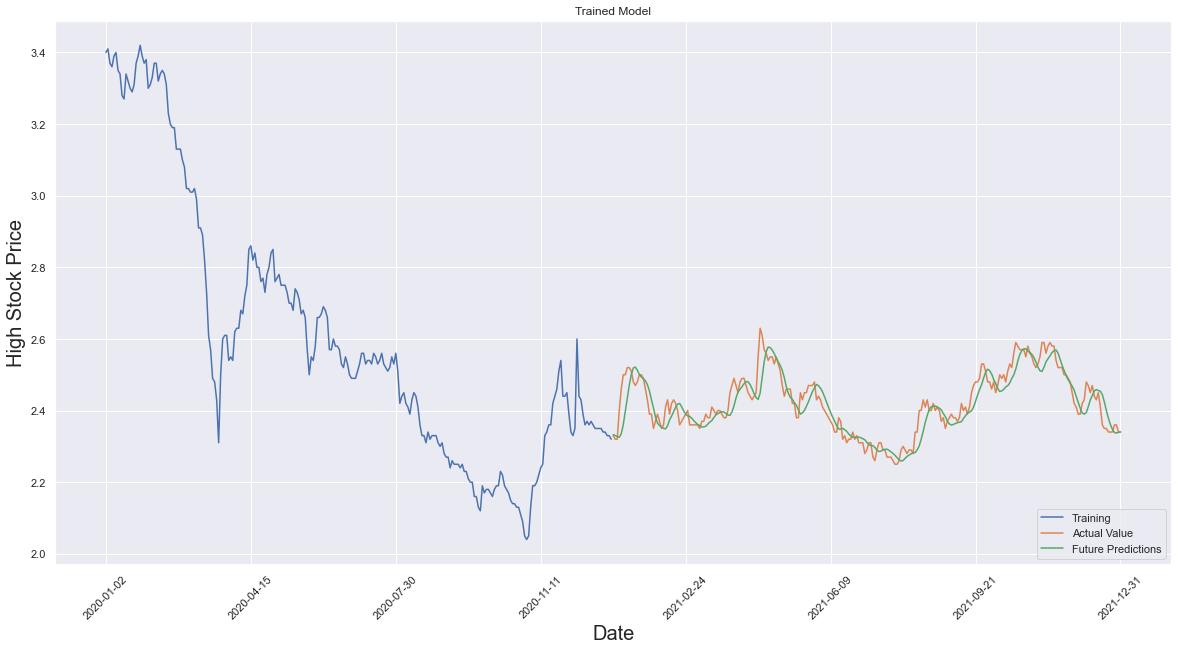

In [65]:
## Ploting data to graph train and actual_value
training = high_df.iloc[:splitter]
actual_value = high_df.iloc[splitter:]
actual_value['Future Predictions'] = pred

## Visualize trainning, validating and predicting values in graph
plt.figure(figsize=(20,10))
plt.title('Trained Model')
plt.xticks(range(0,raw_df.shape[0],72),raw_df['Date'].loc[::72],rotation=45)
plt.xlabel('Date', fontsize=20)
plt.ylabel('High Stock Price', fontsize=20)
plt.plot(training['High'])
plt.plot(actual_value[['High', 'Future Predictions']])
plt.legend(['Training', 'Actual Value', 'Future Predictions'], loc='lower right')
plt.show()